# Import library needed 

- note: As the dataset for final training will be huge, so run the model using gpu is highly recommended

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sb

# **Process Images from disk to convert to Numpy array and resize to 224x224**

-By using code in cell below, original image will be loaded into training set and resize to size needed, and label will be assigned according to naming of image

In [2]:
# load dataset, reshape, extract labels
from os import listdir
from numpy import asarray

# define location of dataset
folder_train = 'train/'
size = (224,224) # image size dimension
shape = (-1,224,224,3)  # array shape

x_train = None
labels = list()

# enumerate files in the directory
for file in listdir(folder_train):
    if file.endswith('.xml'):
        continue
    elif file.startswith('apple'):
        output = 0
    elif file.startswith('banana'):
        output = 1
    elif file.startswith('mixed'):
        output = 2
    elif file.startswith('orange'):
        output = 3
    
    img_raw = Image.open(folder_train + file)
    img_tiny = img_raw.resize(size)
    img_rgb = img_tiny.convert('RGB')
    
    if x_train is None:
        x_train = img_rgb
    else:
        x_train = np.concatenate((x_train, img_rgb))
        
    labels.append(output)
        
x_train = x_train.reshape(shape) #reshape the np.array to tensor   

# convert to a numpy arrays
labels = asarray(labels)

print(x_train.shape, labels.shape)    

C:\Users\User\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(240, 224, 224, 3) (240,)


# **Plot the modified image from array to check the new image**

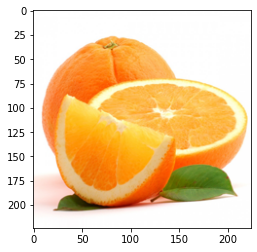

In [3]:
img2 = Image.fromarray(x_train[199])

plt.imshow(img2)

# **One-Hot Encode y labels to denote if a particular image is an apple, banana, orange or mixed.**

In [4]:
#extract unique labels from labels list
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2, 3])

One-Hot encode the label by processing unique label using keras libray

In [5]:
n_labels = len(unique_labels)
y_train = tf.keras.utils.to_categorical(labels, n_labels)
y_train.shape

(240, 4)

# Process test images and One-Hot Encode y test labels

- By using code in cell below, original image in test folder will be loaded into testing set and resize to size needed, and label will be assigned according to naming of image

- One-Hot encode the label of testing image by processing unique label using keras libray

In [6]:
# define location of dataset
folder_test = 'test/'
size = (224,224) # image size dimension
shape = (-1,224,224,3)  # array shape

x_test = None
labels = list()

# enumerate files in the directory
for file in listdir(folder_test):
    if file.endswith('.xml'):
        continue
    elif file.startswith('apple'):
        output = 0
    elif file.startswith('banana'):
        output = 1
    elif file.startswith('mixed'):
        output = 2
    elif file.startswith('orange'):
        output = 3
    
    img_raw = Image.open(folder_test + file)
    img_tiny = img_raw.resize(size)
    img_rgb = img_tiny.convert('RGB')
    
    if x_test is None:
        x_test = img_rgb
    else:
        x_test = np.concatenate((x_test, img_rgb))
        
    labels.append(output)
        
x_test = x_test.reshape(shape) #reshape the np.array to tensor   

# convert to a numpy arrays
labels = asarray(labels)

unique_labels = np.unique(labels)
unique_labels
n_labels = len(unique_labels)
y_test = tf.keras.utils.to_categorical(labels, n_labels)

#normalise train dataset
x_test_norm = x_test/255

print(x_test_norm.shape, y_test.shape)

(60, 224, 224, 3) (60, 4)


# **Verify the input test data and ground truth.**

- Plot and verify one of the testing imaage

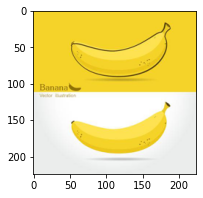

In [7]:
img2 = Image.fromarray(x_test[35])

plt.subplots(figsize=(3,3))
plt.imshow(img2)

- Verify if correct label is used

In [8]:
print(y_test[35])

[0. 1. 0. 0.]


# **Construct the CNN model Based on Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)**

**Reference:** https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [15]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64,  
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(filters=128,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(112, 112, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(filters=256,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(56, 56, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(filters=512,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28, 28, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(filters=512,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(14, 14, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# **Train model with normalized X_train data**

- We did an experiment by using a training set with only original image is included 

In [17]:
#train with 5% validation data
hist = model.fit(x=x_train/255, y=y_train, validation_split=(0.05), epochs=30) 

Epoch 1/30
8/8 [==============================] - 3s 294ms/step - loss: 1.3967 - accuracy: 0.3289 - val_loss: 1.3380 - val_accuracy: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 2s 227ms/step - loss: 1.1943 - accuracy: 0.3289 - val_loss: 1.4754 - val_accuracy: 0.0000e+00
Epoch 3/30
8/8 [==============================] - 2s 207ms/step - loss: 1.1091 - accuracy: 0.4956 - val_loss: 1.1086 - val_accuracy: 0.0000e+00
Epoch 4/30
8/8 [==============================] - 2s 210ms/step - loss: 0.8062 - accuracy: 0.6272 - val_loss: 0.9790 - val_accuracy: 0.0000e+00
Epoch 5/30
8/8 [==============================] - 2s 230ms/step - loss: 0.8517 - accuracy: 0.6272 - val_loss: 1.3036 - val_accuracy: 0.0000e+00
Epoch 6/30
8/8 [==============================] - 2s 207ms/step - loss: 0.8537 - accuracy: 0.6228 - val_loss: 0.7537 - val_accuracy: 0.9167
Epoch 7/30
8/8 [==============================] - 2s 209ms/step - loss: 0.8987 - accuracy: 0.6096 - val_loss: 1.3096 - val_accuracy: 0.0000e

# **Plot the graph for loss and accuracy **

- Plot the graph by using resuult outcome of original training set

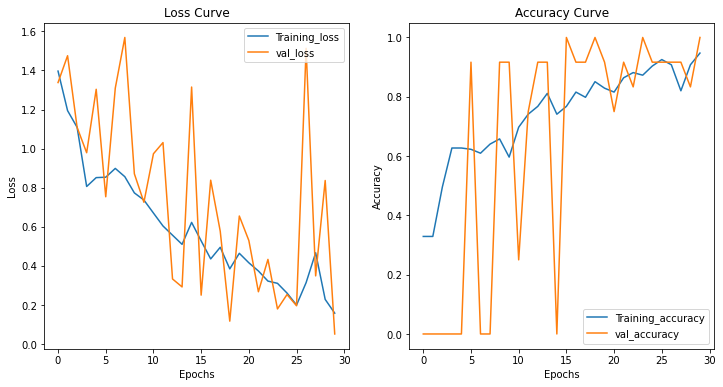

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'],label='Training_loss')
ax[0].plot(hist.history['val_loss'],label='val_loss')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'],label='Training_accuracy')
ax[1].plot(hist.history['val_accuracy'],label='val_accuracy')
ax[1].legend(loc='lower right')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Test our model and perform evaluation

- Accuracy evaluation of original training set

In [19]:
loss, accuracy = model.evaluate(x=x_test_norm, y=y_test)
print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 2s 2s/step - loss: 0.6696 - accuracy: 0.8167
loss = 0.6695732474327087
accuracy = 0.8166666626930237


# Add Image augmentation layers to the model 

- We add image augmentation layer to increase the amount of data by adding slightly modified copies of already existing data, 
  it will serve the purpose of regularizer and helps reduce overfitting when training a machine learning model.

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",           #randomly flip image during training
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),               #randomly rotate image during training
    layers.RandomZoom(0.3),                   #randomly zoom 30% image during training
    layers.RandomCrop(height=224, width=224), #randomly Crop image during training
  ]
)

- Plot a sample image after process with data_augmentation

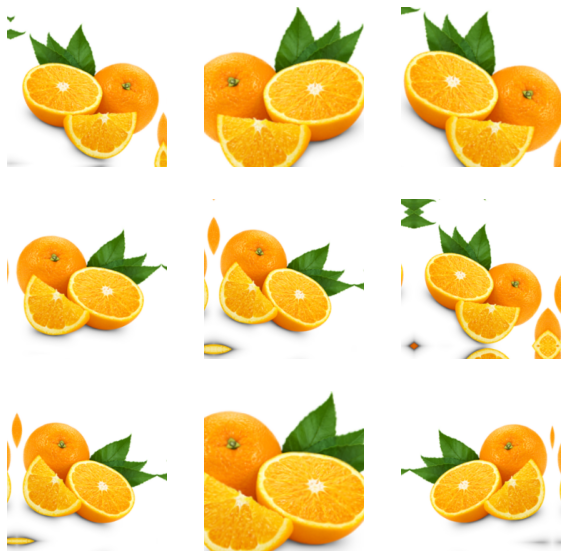

In [21]:
plt.figure(figsize=(10, 10))
images = x_train[220]
images = images.reshape((-1,224,224,3))
for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Construct a model with Data Augmentation layer

In [53]:
model2 = tf.keras.Sequential()
model2.add(data_augmentation)  # Build in data augmentation layer into the train model
model2.add(tf.keras.layers.Conv2D(filters=64,  
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(224, 224, 3)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))

model2.add(tf.keras.layers.Conv2D(filters=128,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(112, 112, 3)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))

model2.add(tf.keras.layers.Conv2D(filters=256,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(56, 56, 3)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))

model2.add(tf.keras.layers.Conv2D(filters=512,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28, 28, 3)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))

model2.add(tf.keras.layers.Conv2D(filters=512,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(14, 14, 3)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(rate=0.5))
model2.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.5))
model2.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model2.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model2.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [54]:
model2.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# **Train model with normalized X_train data + Data augmentation (experiment)

In [27]:
#train with 5% validation data
hist = model2.fit(x=x_train/255, y=y_train, validation_split=(0.05), epochs=30) 

Epoch 1/30
8/8 [==============================] - 5s 311ms/step - loss: 1.4894 - accuracy: 0.3333 - val_loss: 1.3629 - val_accuracy: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 2s 232ms/step - loss: 1.3617 - accuracy: 0.3202 - val_loss: 1.4295 - val_accuracy: 0.0000e+00
Epoch 3/30
8/8 [==============================] - 2s 243ms/step - loss: 1.3341 - accuracy: 0.3070 - val_loss: 1.4017 - val_accuracy: 0.0000e+00
Epoch 4/30
8/8 [==============================] - 2s 249ms/step - loss: 1.3187 - accuracy: 0.3421 - val_loss: 1.3300 - val_accuracy: 0.0000e+00
Epoch 5/30
8/8 [==============================] - 2s 245ms/step - loss: 1.3225 - accuracy: 0.3070 - val_loss: 1.1361 - val_accuracy: 1.0000
Epoch 6/30
8/8 [==============================] - 2s 243ms/step - loss: 1.2368 - accuracy: 0.3728 - val_loss: 1.4471 - val_accuracy: 0.0000e+00
Epoch 7/30
8/8 [==============================] - 2s 245ms/step - loss: 0.9623 - accuracy: 0.6360 - val_loss: 1.0233 - val_accuracy: 0.0000e

# **Plot the graph for loss and accuracy**

- Plot the graph by using resuult outcome of original training set + data augmentation layer

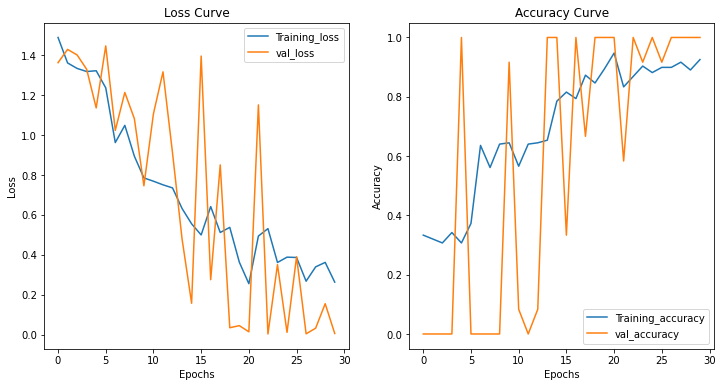

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'],label='Training_loss')
ax[0].plot(hist.history['val_loss'],label='val_loss')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'],label='Training_accuracy')
ax[1].plot(hist.history['val_accuracy'],label='val_accuracy')
ax[1].legend(loc='lower right')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Test our model and perform evaluation

Accuracy evaluation of original training set + data augmentation

In [29]:
loss, accuracy = model2.evaluate(x=x_test_norm, y=y_test)
print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 1s 54ms/step - loss: 0.4241 - accuracy: 0.9000
loss = 0.42406272888183594
accuracy = 0.8999999761581421


# **Transform Images using Albumentations**

In [30]:
transform = A.Compose([    #Transform grayscale
    A.ToGray(p=1)
])
trans_jit = A.Compose([    #Transform colors and Hue
    A.Sharpen(alpha=(1, 1), lightness=(1, 1.0), p=1)
])
trans_blur = A.Compose([   #Transform to add blur
    A.MedianBlur(blur_limit=17, p=1),
])

# Transform original images to Grayscale

- Attempt to create training model with greyscale image (transformed from original image), purpose is to create more dataset
  and regularize the learning proccess

In [31]:
x_train_trans = None

for file in listdir(folder_train):
    if file.endswith('.xml'):
        continue
    else:
        img_raw = Image.open(folder_train + file)
        img_small = img_raw.resize(size)
        img_rgb = img_small.convert('RGB')
        img = np.array(img_rgb)
        transformed = transform(image=img)
        img_trans = transformed["image"]
        if x_train_trans is None:
            x_train_trans = img_trans
        else:
            x_train_trans = np.concatenate((x_train_trans, img_trans))
x_train_trans = x_train_trans.reshape(shape)        
x_train_trans.shape

(240, 224, 224, 3)

- Verify the image is grey scaled

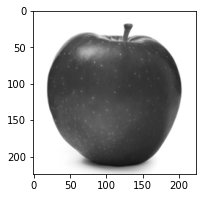

In [32]:
img2 = Image.fromarray(x_train_trans[20])

plt.subplots(figsize=(3,3))
plt.imshow(img2)

# **Train the same model with only Greyscale images**(Experiment)

In [36]:
#train with 5% validation data
hist = model2.fit(x=x_train_trans/255, y=y_train, validation_split=(0.05), epochs=30) 

Epoch 1/30
8/8 [==============================] - 4s 347ms/step - loss: 1.5285 - accuracy: 0.2544 - val_loss: 1.3604 - val_accuracy: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 2s 255ms/step - loss: 1.3335 - accuracy: 0.3289 - val_loss: 1.4548 - val_accuracy: 0.0000e+00
Epoch 3/30
8/8 [==============================] - 2s 251ms/step - loss: 1.3265 - accuracy: 0.2456 - val_loss: 1.3314 - val_accuracy: 0.0000e+00
Epoch 4/30
8/8 [==============================] - 2s 250ms/step - loss: 1.3204 - accuracy: 0.3289 - val_loss: 1.4140 - val_accuracy: 0.0000e+00
Epoch 5/30
8/8 [==============================] - 2s 240ms/step - loss: 1.3018 - accuracy: 0.3333 - val_loss: 1.4199 - val_accuracy: 0.0000e+00
Epoch 6/30
8/8 [==============================] - 2s 234ms/step - loss: 1.3008 - accuracy: 0.3333 - val_loss: 1.4133 - val_accuracy: 0.0000e+00
Epoch 7/30
8/8 [==============================] - 2s 242ms/step - loss: 1.2580 - accuracy: 0.3465 - val_loss: 1.3715 - val_accuracy: 0.0

# **Plot the graph for loss and accuracy with only greyscale images**(Experiment)**

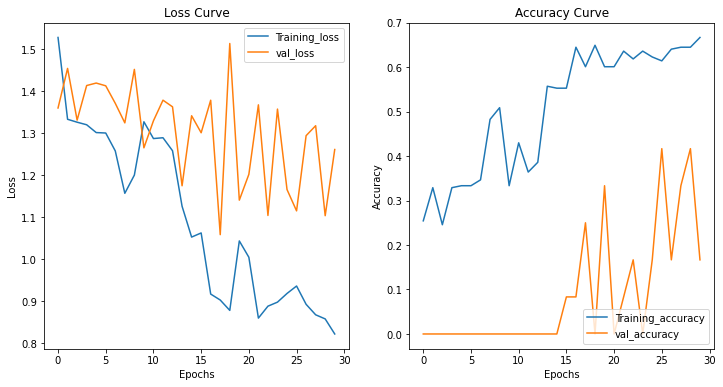

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'],label='Training_loss')
ax[0].plot(hist.history['val_loss'],label='val_loss')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'],label='Training_accuracy')
ax[1].plot(hist.history['val_accuracy'],label='val_accuracy')
ax[1].legend(loc='lower right')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Test our model and perform evaluation (Greyscale Image -experiment)

In [38]:
loss, accuracy = model2.evaluate(x=x_test_norm, y=y_test)
print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 1s 53ms/step - loss: 1.0471 - accuracy: 0.5000
loss = 1.0470653772354126
accuracy = 0.5


# Transform Images using Albumentations



In [39]:
#Randomly Alter Brightness and Contrast
transform = A.Compose([    
    A.RandomBrightnessContrast (brightness_limit=(0.2,0.8), 
                                contrast_limit=(0.2,0.8), brightness_by_max=False, p=1)
])

#Transform to add blur
trans_blur = A.Compose([   
    A.MedianBlur(blur_limit=21, p=1),
])


# Transform original images to Randomly Alter Brightness and Contrast level

- Attempt to create training model with random brightness and contrast image (transformed from original image), purpose is to create more dataset and regularize the learning proccess

In [40]:
x_train_trans2 = None

for file in listdir(folder_train):
    if file.endswith('.xml'):
        continue
    else:
        img_raw = Image.open(folder_train + file)
        img_small = img_raw.resize(size)
        img_rgb = img_small.convert('RGB')
        img = np.array(img_rgb)
        transformed = transform(image=img)
        img_trans2 = transformed["image"]
        if x_train_trans2 is None:
            x_train_trans2 = img_trans2
        else:
            x_train_trans2= np.concatenate((x_train_trans2, img_trans2))
x_train_trans2 = x_train_trans2.reshape(shape)        
x_train_trans2.shape

(240, 224, 224, 3)

- Verify the image is altered

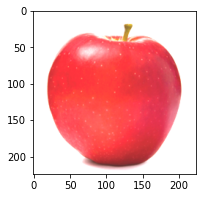

In [41]:
img2 = Image.fromarray(x_train_trans2[20])

plt.subplots(figsize=(3,3))
plt.imshow(img2)

# Train the same model with only Altered Brightness and Contrast images(Experiment)

In [65]:
#train with 5% validation data
hist = model2.fit(x=x_train_trans2/255, y=y_train, validation_split=(0.05), epochs=30) 

Epoch 1/30
8/8 [==============================] - 2s 252ms/step - loss: 0.8365 - accuracy: 0.6491 - val_loss: 1.2446 - val_accuracy: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 2s 224ms/step - loss: 0.7795 - accuracy: 0.6535 - val_loss: 1.1749 - val_accuracy: 0.0833
Epoch 3/30
8/8 [==============================] - 2s 240ms/step - loss: 0.7099 - accuracy: 0.6623 - val_loss: 0.9958 - val_accuracy: 0.0000e+00
Epoch 4/30
8/8 [==============================] - 2s 246ms/step - loss: 0.6889 - accuracy: 0.6579 - val_loss: 1.1719 - val_accuracy: 0.0000e+00
Epoch 5/30
8/8 [==============================] - 2s 230ms/step - loss: 0.7007 - accuracy: 0.6491 - val_loss: 0.9761 - val_accuracy: 0.0833
Epoch 6/30
8/8 [==============================] - 2s 217ms/step - loss: 0.6707 - accuracy: 0.7193 - val_loss: 0.9229 - val_accuracy: 0.0833
Epoch 7/30
8/8 [==============================] - 2s 242ms/step - loss: 0.7872 - accuracy: 0.6535 - val_loss: 1.3678 - val_accuracy: 0.0000e+00
Epoc

# Plot the graph for loss and accuracy with only Altered images(Experiment)**

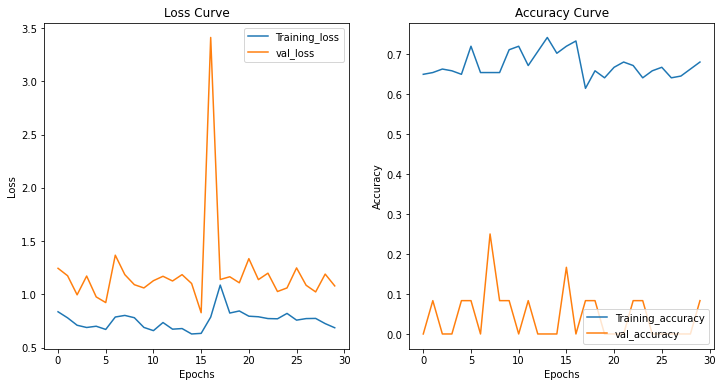

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'],label='Training_loss')
ax[0].plot(hist.history['val_loss'],label='val_loss')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'],label='Training_accuracy')
ax[1].plot(hist.history['val_accuracy'],label='val_accuracy')
ax[1].legend(loc='lower right')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Test our model and perform evaluation (Altered Image -Experiment)

In [67]:
loss, accuracy = model2.evaluate(x=x_test_norm, y=y_test)
print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 1s 64ms/step - loss: 0.9395 - accuracy: 0.6667
loss = 0.9394879937171936
accuracy = 0.6666666865348816


# Transform images to add Blur

- Attempt to create training model with blur image(transformed from original image), purpose is to create more dataset and regularize the learning proccess

In [42]:
x_train_blur = None
for file in listdir(folder_train):
    if file.endswith('.xml'):
        continue
    else:
        img_raw = Image.open(folder_train + file)
        img_small = img_raw.resize(size)
        img_rgb = img_small.convert('RGB')
        img = np.array(img_rgb)
        transformed = trans_blur(image=img)
        img_trans = transformed["image"]
        if x_train_blur is None:
            x_train_blur = img_trans
        else:
            x_train_blur = np.concatenate((x_train_blur, img_trans))
x_train_blur = x_train_blur.reshape(shape)        
x_train_blur.shape

(240, 224, 224, 3)

- Verify the image is Blured

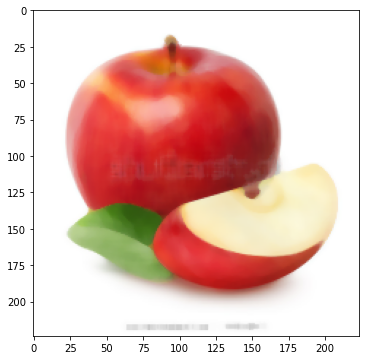

In [43]:
img2 = Image.fromarray(x_train_blur[3])

plt.subplots(figsize=(6,6))
plt.imshow(img2)

# **Train the same model with only blur image**(Experiment)

In [44]:
#train with 5% validation data
hist = model2.fit(x=x_train_blur/255, y=y_train, validation_split=(0.05), epochs=30) 

Epoch 1/30
8/8 [==============================] - 2s 249ms/step - loss: 0.8358 - accuracy: 0.6491 - val_loss: 1.9667 - val_accuracy: 0.0833
Epoch 2/30
8/8 [==============================] - 2s 213ms/step - loss: 1.0569 - accuracy: 0.5658 - val_loss: 1.0763 - val_accuracy: 0.5000
Epoch 3/30
8/8 [==============================] - 2s 242ms/step - loss: 0.8142 - accuracy: 0.6404 - val_loss: 1.5619 - val_accuracy: 0.0833
Epoch 4/30
8/8 [==============================] - 2s 245ms/step - loss: 0.7601 - accuracy: 0.6579 - val_loss: 1.1990 - val_accuracy: 0.1667
Epoch 5/30
8/8 [==============================] - 2s 246ms/step - loss: 0.7614 - accuracy: 0.6842 - val_loss: 1.0255 - val_accuracy: 0.2500
Epoch 6/30
8/8 [==============================] - 2s 244ms/step - loss: 0.7100 - accuracy: 0.6798 - val_loss: 1.0448 - val_accuracy: 0.3333
Epoch 7/30
8/8 [==============================] - 2s 244ms/step - loss: 0.6553 - accuracy: 0.7763 - val_loss: 0.6558 - val_accuracy: 0.9167
Epoch 8/30
8/8 [====

# **Plot the graph for loss and accuracy with only blur images**(Experiment)**

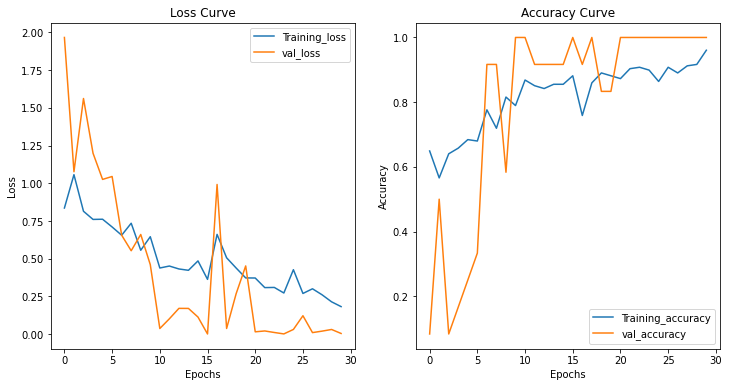

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'],label='Training_loss')
ax[0].plot(hist.history['val_loss'],label='val_loss')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'],label='Training_accuracy')
ax[1].plot(hist.history['val_accuracy'],label='val_accuracy')
ax[1].legend(loc='lower right')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

## Test our model and perform evaluation (Blur Image -experiment) ##

In [47]:
loss, accuracy = model2.evaluate(x=x_test_norm, y=y_test)
print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 1s 83ms/step - loss: 0.3769 - accuracy: 0.8833
loss = 0.37688547372817993
accuracy = 0.8833333253860474


In [48]:
# plt.figure(figsize=(40,58))
# images = x_train_blur[80]
# images = images.reshape((-1,224,224,3))
# j=0
# for i in range(50,68):
    
#     augmented_images = x_train_blur[i]
#     ax = plt.subplot(6, 6, j + 1)
#     plt.imshow(augmented_images)
#     plt.axis("off")
#     j+=1

# Concatenate all the transformed images and groud truths into xtrain and ytrain to increase train data set

-After perform numbers of testing we decide to include blur and greyscale image into dataset which will perform the best result

-Contrast image will not be used

-Dataset used for training will be 720 image after adding blur and greyscale image into it

In [49]:
xtrain = np.concatenate((x_train,x_train_trans))
# xtrain = np.concatenate((xtrain,x_train_jit))
xtrain = np.concatenate((xtrain,x_train_blur))
ytrain = np.concatenate((y_train,y_train))
ytrain = np.concatenate((ytrain,y_train))
# ytrain = np.concatenate((ytrain,y_train))
print(ytrain[238])
print(xtrain.shape)
print(ytrain.shape)

[0. 0. 0. 1.]
(720, 224, 224, 3)
(720, 4)


# **Finally Train the same model with all Transform images combined**

- We use epoch = 60 after realizing it will be the best number for model to reach its best training accuracy after testing
- note: As the dataset for final training will be huge, so run the model using gpu is highly recommended
- We use batch size 64 for 720 image to reduce the running time and avoid overfitting

In [55]:
#train with 5% validation data
hist = model2.fit(x=xtrain/255, y=ytrain, validation_split=(0.05), batch_size=64, epochs=60) 

Epoch 1/60
11/11 [==============================] - 7s 386ms/step - loss: 1.3672 - accuracy: 0.3129 - val_loss: 1.2927 - val_accuracy: 0.0000e+00
Epoch 2/60
11/11 [==============================] - 4s 375ms/step - loss: 1.3310 - accuracy: 0.3012 - val_loss: 1.4447 - val_accuracy: 0.0000e+00
Epoch 3/60
11/11 [==============================] - 4s 373ms/step - loss: 1.3016 - accuracy: 0.3143 - val_loss: 1.5219 - val_accuracy: 0.0000e+00
Epoch 4/60
11/11 [==============================] - 4s 375ms/step - loss: 1.2298 - accuracy: 0.4313 - val_loss: 1.1530 - val_accuracy: 0.0000e+00
Epoch 5/60
11/11 [==============================] - 4s 367ms/step - loss: 1.1602 - accuracy: 0.4561 - val_loss: 1.3039 - val_accuracy: 0.0000e+00
Epoch 6/60
11/11 [==============================] - 4s 374ms/step - loss: 0.9642 - accuracy: 0.6067 - val_loss: 0.6087 - val_accuracy: 1.0000
Epoch 7/60
11/11 [==============================] - 4s 377ms/step - loss: 0.8608 - accuracy: 0.5994 - val_loss: 1.2376 - val_acc

11/11 [==============================] - 4s 371ms/step - loss: 0.2523 - accuracy: 0.9064 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 59/60
11/11 [==============================] - 4s 383ms/step - loss: 0.2159 - accuracy: 0.9254 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 60/60
11/11 [==============================] - 4s 367ms/step - loss: 0.3015 - accuracy: 0.8801 - val_loss: 5.6732e-04 - val_accuracy: 1.0000


# **Plot the graph for loss and accuracy**

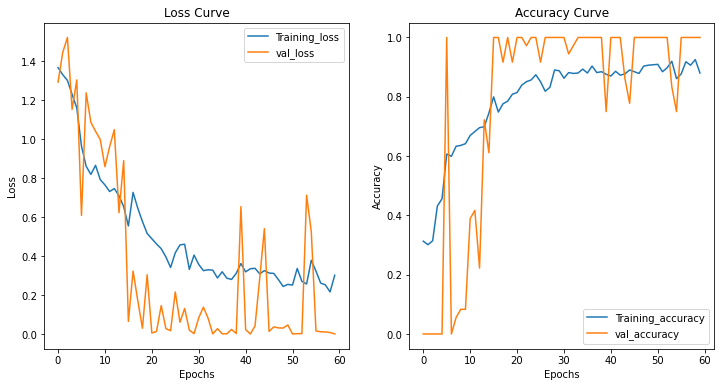

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'],label='Training_loss')
ax[0].plot(hist.history['val_loss'],label='val_loss')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'],label='Training_accuracy')
ax[1].plot(hist.history['val_accuracy'],label='val_accuracy')
ax[1].legend(loc='lower right')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Test our model and perform evaluation

- Final testing accuracy will range from 0.9 to 0.95 if the model work nicely
- As you can observe, accuracy and loss number have improved compared to original dataset(before augmentation and transforming)

In [57]:
loss, accuracy = model2.evaluate(x=x_test_norm, y=y_test)
print('loss =', loss)
print('accuracy =', accuracy) 

2/2 [==============================] - 1s 56ms/step - loss: 0.3995 - accuracy: 0.9167
loss = 0.39947471022605896
accuracy = 0.9166666865348816


**Prediction data from the model**

In [58]:
predictions = model2.predict(x=x_test_norm)
for i in np.arange(len(predictions)):
    print(f'Index{i}''\tActual: ', y_test[i], 'Predicted: ', predictions[i])

Index0	Actual:  [1. 0. 0. 0.] Predicted:  [9.9791926e-01 2.0436437e-03 1.1969377e-06 3.5954221e-05]
Index1	Actual:  [1. 0. 0. 0.] Predicted:  [9.8681462e-01 9.5285447e-03 3.7350613e-04 3.2833344e-03]
Index2	Actual:  [1. 0. 0. 0.] Predicted:  [9.9674052e-01 2.6252212e-03 4.1801086e-06 6.3011912e-04]
Index3	Actual:  [1. 0. 0. 0.] Predicted:  [9.9976343e-01 1.7288320e-04 2.4736084e-07 6.3432926e-05]
Index4	Actual:  [1. 0. 0. 0.] Predicted:  [9.9982965e-01 9.9953497e-05 2.8713711e-08 7.0268616e-05]
Index5	Actual:  [1. 0. 0. 0.] Predicted:  [9.9912030e-01 5.5604137e-04 7.7584440e-07 3.2286061e-04]
Index6	Actual:  [1. 0. 0. 0.] Predicted:  [9.8861116e-01 9.5038617e-05 8.2433637e-08 1.1293772e-02]
Index7	Actual:  [1. 0. 0. 0.] Predicted:  [8.0948180e-01 8.7930532e-03 3.1397716e-04 1.8141115e-01]
Index8	Actual:  [1. 0. 0. 0.] Predicted:  [9.91524220e-01 1.08578526e-04 4.62214928e-07 8.36672727e-03]
Index9	Actual:  [1. 0. 0. 0.] Predicted:  [0.9592589  0.02651281 0.00531746 0.00891086]
Index10	

## Check total counts of correct and wrong

In [59]:
n_preds = len(predictions)

correct = 0
wrong = 0

for i in np.arange(n_preds):
    pred_max = np.argmax(predictions[i])
    actual_max = np.argmax(y_test[i])
    if pred_max == actual_max:
        correct += 1
    else:
        wrong += 1

print('correct =', correct, ', wrong =', wrong)
print('accuracy = ', (correct/n_preds)*100,'%')

correct = 55 , wrong = 5
accuracy =  91.66666666666666 %


## Test with a Random image from test data

In [62]:
img3 = x_test_norm[40]

img_array = tf.keras.preprocessing.image.img_to_array(img3)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])


label_names = ['apple', 'banana', 'mixed', 'orange']
print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(label_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to mixed with a 45.70 % confidence.


## Verify the prediction

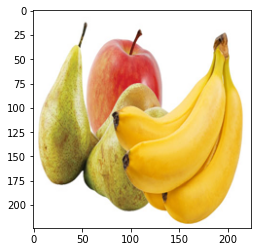

In [63]:
plt.imshow(x_test_norm[40])